In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


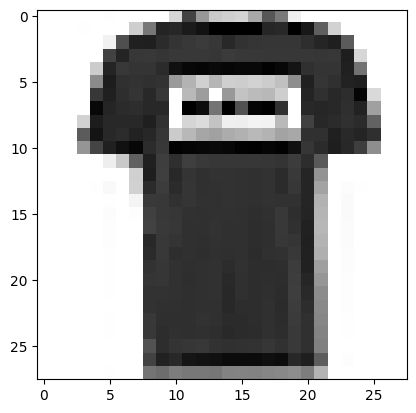

In [35]:
plt.imshow(train_images[1],  cmap=plt.cm.binary)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

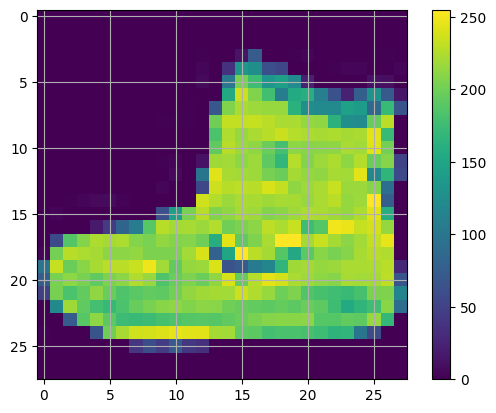

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
plt.figure(figsize=(10,10))
for i in range(25,51):
    plt.subplot(5,5,i+1)
    plt.xticks([]) #gets rid of each individual x axis marker
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

ValueError: num must be 1 <= num <= 25, not 26

<Figure size 1000x1000 with 0 Axes>

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 2ms/step - loss: 3.2412 - accuracy: 0.7024
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6617 - accuracy: 0.7603
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5729 - accuracy: 0.7944
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5581 - accuracy: 0.8025
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5254 - accuracy: 0.8156
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4967 - accuracy: 0.8277
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4778 - accuracy: 0.8344
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4735 - accuracy: 0.8369
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4547 - accuracy: 0.8422
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.464

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3341 - accuracy: 0.8840 - 420ms/epoch - 1ms/step

Test accuracy: 0.8840000033378601


In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 640us/step


In [16]:
predictions[0]


array([1.3945605e-07, 4.7040705e-11, 1.2703069e-07, 3.1341257e-10,
       4.8874820e-09, 1.0756509e-04, 2.5505099e-07, 1.6023643e-02,
       2.1842126e-07, 9.8386800e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

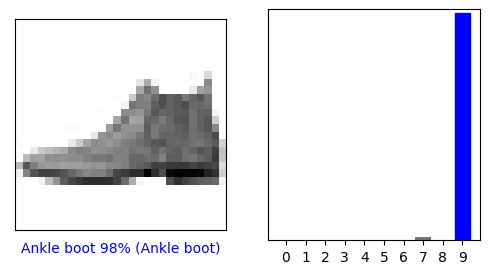

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

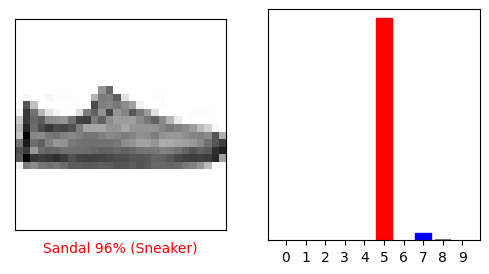

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

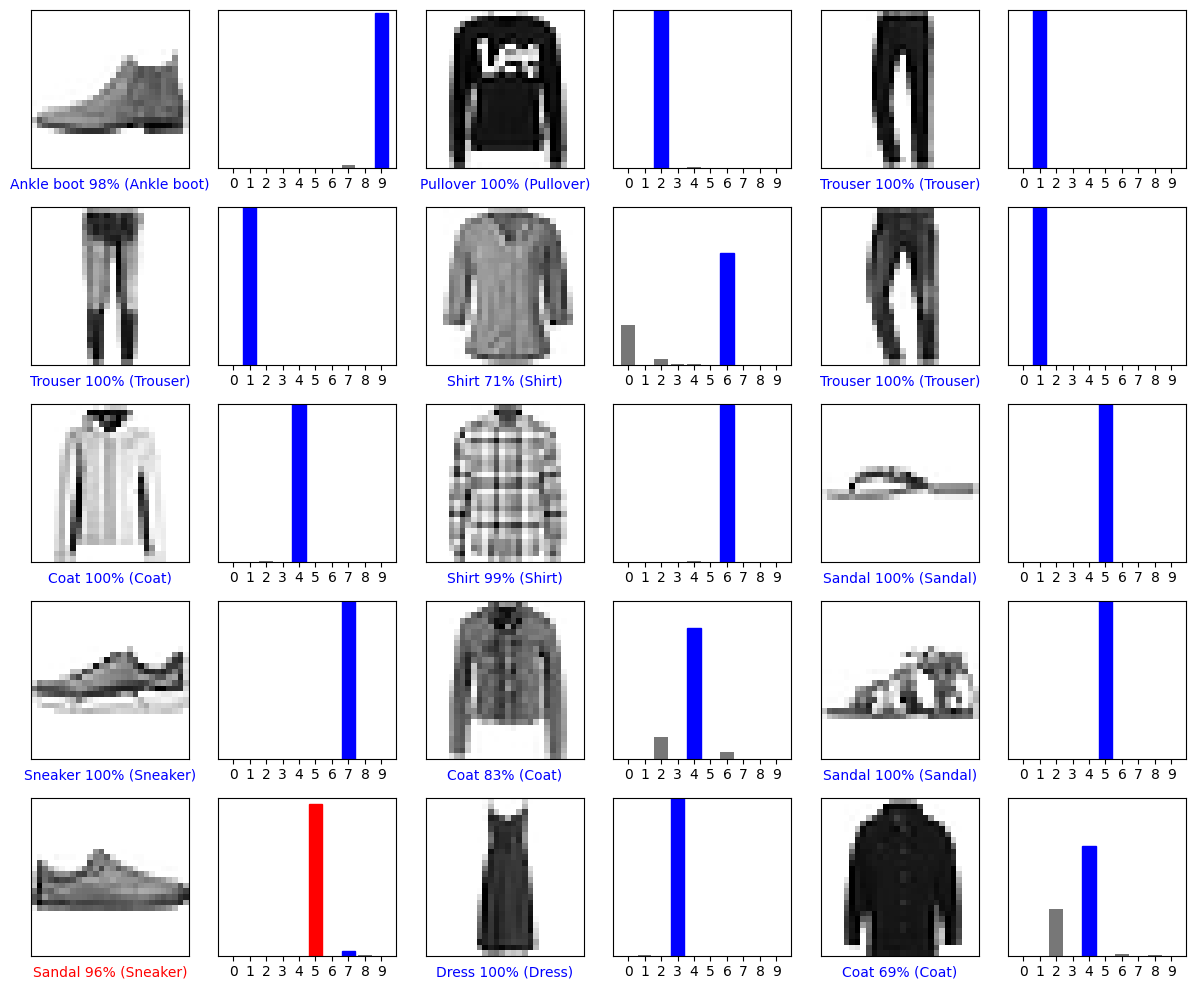

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 14ms/step
[[3.3125514e-05 2.4125635e-14 9.9898547e-01 3.1248062e-10 8.0497918e-04
  1.3686359e-10 1.7639186e-04 1.2326946e-13 1.1305042e-10 2.6835274e-16]]


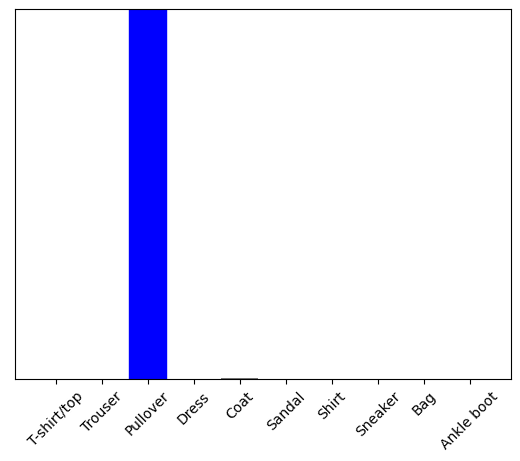

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()